<a href="https://colab.research.google.com/github/andreacangiani/NSPDE-ANA2024/blob/main/Python/CP1_worked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

I will assume the knowledge acquired from the 1st semester course by Rozza and Heltai.

Good free book on Scientific Computing with Python:

https://link.springer.com/book/10.1007/978-3-030-50356-7



# Python for Scientific Computing: quick recap

**Why Python?**

    Python is a modern, general-purpose, object-oriented, high-level programming language with huge community of users

* No license costs. Immediately available (no installation required) from cloud computing platforms, eg. Google [Colab](https://colab.research.google.com)
  * You'll need a Google account to access Google colab

* Extensive ecosystem of scientific libraries (modules):
  * [numpy](https://www.numpy.org) - Numerical Python
  * [scipy](https://www.scipy.org) -  Scientific Python
  * [matplotlib](https://www.matplotlib.org) - graphics library
  * [petsc4py](https://gitlab.com/petsc/petsc) & [slepc4py](https://gitlab.com/slepc/slepc) - vast range of sequential or parallel linear or nonlinear solvers, time stepping, optimization, and eigensolvers
  * [FEniCS](https://www.fenicsproject.org/) & [Firedrake](https://www.firedrakeproject.org) - finite element method (FEM) platforms.

You can get this colab notebook by typing the line:

**!git clone https://github.com/andreacangiani/NSPDE-ANA2023.git**

**Modules**

In [68]:
import math

print(dir(math))

help(math.sin)

x = math.sin(math.pi / 2)

print(x)

del math

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'acos', 'acosh', 'asin', 'asinh', 'atan', 'atan2', 'atanh', 'cbrt', 'ceil', 'comb', 'copysign', 'cos', 'cosh', 'degrees', 'dist', 'e', 'erf', 'erfc', 'exp', 'exp2', 'expm1', 'fabs', 'factorial', 'floor', 'fmod', 'frexp', 'fsum', 'gamma', 'gcd', 'hypot', 'inf', 'isclose', 'isfinite', 'isinf', 'isnan', 'isqrt', 'lcm', 'ldexp', 'lgamma', 'log', 'log10', 'log1p', 'log2', 'modf', 'nan', 'nextafter', 'perm', 'pi', 'pow', 'prod', 'radians', 'remainder', 'sin', 'sinh', 'sqrt', 'tan', 'tanh', 'tau', 'trunc', 'ulp']
Help on built-in function sin in module math:

sin(x, /)
    Return the sine of x (measured in radians).

1.0


Import just what you need...

In [69]:
from math import sin, pi

print(sin(pi/4))

0.7071067811865475


**Variables**
Convention: variable names start with a lower-case letter (Class names start with a capital letter).

In [70]:
x = pi

print(type(x))

x = 1

print(type(x))

<class 'float'>
<class 'int'>


**Operators**

* Arithmetic operators:
    `+`, `-`, `*`, `/`, `//` (integer division), `**` power

* Boolean operators:
    `and`, `not`, `or`

* Comparison operators:
    `>`, `<`, `>=` (greater or equal), `<=` (less or equal), `==` equal, `!=` not equal.

In [71]:
print(2**3)

8


In [72]:
my_bool = True and False

my_string = "Can something be true and false at the same time???  "

print(my_string, my_bool)

Can something be true and false at the same time???   False


In [73]:
3 >= 2

True

In [74]:
statement1 = (3 <= 2)
statement2 = (0 == 1)

# Note! Indentation based!
if statement1:
    print("statement1 is True")
elif statement2:
    print("statement2 is True")
else:
    print("statement1 and statement2 are both False")

statement1 and statement2 are both False


**Lists**

In [75]:
my_list = [1, 2, 3, 4, 5, "a"]

In [76]:
my_nested_list = [[1, 2], [3, 4, 5]]

Turning lists into NumPy arrays

In [77]:
import numpy as np # module for arrays

my_list = [1, 2, 3, 4, 5]

x = np.array(my_list)

print(x)


[1 2 3 4 5]


In [78]:
print(type(x))

<class 'numpy.ndarray'>


**"for" and and "while" loops**

In [79]:
v = [0, 1, 2, 3]

In [80]:
for x in [0, 1, 2, 3]:
    print(x)

print("is identical to")

for x in range(4):
    print(x)

0
1
2
3
is identical to
0
1
2
3


In [81]:
i = 0
while i < 3:
    print(i)
    i += 1

print("is identical to")


i = 0
while i<len(v)-1:
  print(v[i])
  i = i + 1

0
1
2
is identical to
0
1
2


Flexible use of for loops

In [82]:
for x in range(0, -6, -2):
    print(x)

0
-2
-4


**Functions**

In [83]:
def mult(f1,f2):
  # returns product of arguments
  return f1*f2

print(mult(2,3))

6


Functions with more outputs

In [84]:
def mult_and_sum (f1,f2):
  # returns product of arguments
  return f1 * f2, f1 + f2

m, s = mult_and_sum(2,3)
print(m, s)

6 5


In [85]:
def powers (x,p=2):
  # returns given power
  # default is p=2
  return x**p

print(powers(2))
print(powers(2,3))

4
8


Function implementing:
$$
f(x)=
\left\{
\begin{array}{l}
0,\quad x<0\\
x,\quad 0\le x<1\\
2-x,\quad 1\le x<2\\
0,\quad x\ge 2
\end{array}
\right.
$$

In [86]:
def f(x):
  if x < 0:
    return 0
  elif 0 <= x < 1:
    return x
  elif 1 <= x < 2:
    return 2 - x
  elif x >= 2:
    return 0

In [87]:
f(3)

0

Lambda functions are one-line functions:

In [88]:
f = lambda x, y, z: x**2 + y - z

print(f(1,1, 8))

-6


# Divided Difference formulas

Implement basic divided difference formulas:

$\delta_{h,+} f (x)= \frac{f(x+h)-f(x)}{h}  \quad$    (FD)

$\delta_{h,-} f (x)= \frac{f(x)-f(x-h)}{h}  \quad$    (BD)

$\delta_{h} f (x)= \frac{f(x+h/2)-f(x-h/2)}{h}  \quad$    (CD)

In [89]:
import matplotlib
#pylap inline
import sympy as sym

Implement backward formula

In [90]:
def back_diff(x,h,f):
  return (f(x)-f(x-h))/h

In [91]:
t = sym.var('t')
fsym = 0.5 * t**2
fdsym = fsym.diff(t,1)
f = sym.lambdify(t,fsym)
fd = sym.lambdify(t,fdsym)

x=0.5
print(fd(x))


0.5


In [92]:
h=0.0001
print(back_diff(x,h,f))


0.49994999999997125


Check rate of convergence

In [93]:
x=0.5
nexp = 8
error = np.zeros(nexp)

for i in range(nexp):
  n = 2**(i+1)
  h = 1/n
  bd = back_diff(x,h,f)
  error[i] = abs(fd(x)-bd)


print(np.log(error[1:nexp]/error[0:nexp-1])/np.log(2))

[-1. -1. -1. -1. -1. -1. -1.]


Let us now fix a grid and compute the FD in matrix form

In [94]:
a = 0
b = 1
n = 5

h = (b-a) / n

x = np.linspace(a,b,n+1)

print(x)

[0.  0.2 0.4 0.6 0.8 1. ]


Implement FD in matrix form

In [95]:
fd = np.zeros((n+1,n+1))

for i in range(n):
  fd[i,i] = -1
  fd[i,i+1] = 1

fd = fd / h

In [96]:
print(fd)

[[-5.  5.  0.  0.  0.  0.]
 [ 0. -5.  5.  0.  0.  0.]
 [ 0.  0. -5.  5.  0.  0.]
 [ 0.  0.  0. -5.  5.  0.]
 [ 0.  0.  0.  0. -5.  5.]
 [ 0.  0.  0.  0.  0.  0.]]


In [97]:
u = f(x)

u_x = fd.dot(u)[0:n]

In [98]:
print(x[0:n])
print(u_x)

[0.  0.2 0.4 0.6 0.8]
[0.1 0.3 0.5 0.7 0.9]


Let's check convergence!

In [99]:
def fd(a,b,n):
  h = (b-a) / n
  fd = np.zeros((n+1,n+1))

  for i in range(n):
    fd[i,i] = -1
    fd[i,i+1] = 1

  return fd / h


In [100]:
t = sym.var('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_x = sym.lambdify(t, my_f.diff(t,1))

no_expe = 8
error = np.zeros(no_expe)
nn = np.zeros(no_expe)

for i in range(no_expe):
  n = 2**(i+1)
  nn[i] = n
  x = np.linspace(a,b,n+1)
  fd_mat = fd(a,b,n)
  u_x = fd_mat.dot(fsym(x))[1:n]
  error[i] = max (abs(u_x-fsym_x(x)[1:n]))





Print error

In [101]:
print(error)

[0.15349167 0.09235997 0.049577   0.02556705 0.01296891 0.00652962
 0.00327595 0.00164074]


Plot error

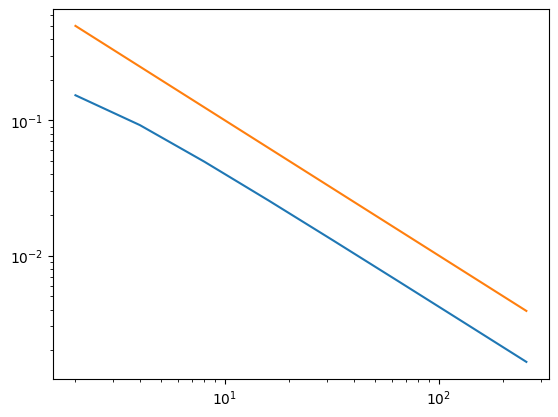

In [102]:
import matplotlib.pyplot

matplotlib.pyplot.loglog(nn,error) # log-log plot of error

matplotlib.pyplot.loglog(nn,nn**(-1)) # log-log plot of 1/n

**Exercise 1** Implement the BD and CD formulas in matrix form as done for the FD formula. Display in the same plot the error obtained with all three formulas to verify the theoretical order of convergence.

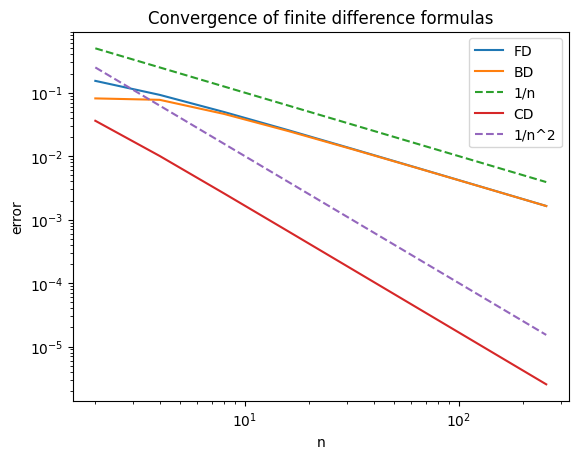

In [103]:
# Implement the BD formula in matrix form
def bd(a,b,n):
  h = (b-a) / n
  bd = np.zeros((n+1,n+1))

  for i in range(n):
    bd[i,i] = 1
    if i > 0:
      bd[i,i-1] = -1

  return bd / h

# Implement the CD formula in matrix form
def cd(a,b,n):
  h = (b-a) / n
  cd = np.zeros((n+1,n+1))

  for i in range(n):
    cd[i,i] = 0
    cd[i,i+1] = 1
    if i > 0:
      cd[i,i-1] = -1

  return cd / (2*h)

# Display in the same plot the error of the FD, BD and CD formulas to verify the order of convergence
t = sym.var('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_x = sym.lambdify(t, my_f.diff(t,1))

no_expe = 8
error_fd = np.zeros(no_expe)
error_bd = np.zeros(no_expe)
error_cd = np.zeros(no_expe)
nn = np.zeros(no_expe)

for i in range(no_expe):
  n = 2**(i+1)
  nn[i] = n
  x = np.linspace(a,b,n+1)
  fd_mat = fd(a,b,n)
  bd_mat = bd(a,b,n)
  cd_mat = cd(a,b,n)
  u_x_fd = fd_mat.dot(fsym(x))[1:n]
  u_x_bd = bd_mat.dot(fsym(x))[1:n]
  u_x_cd = cd_mat.dot(fsym(x))[1:n]
  error_fd[i] = max (abs(u_x_fd-fsym_x(x)[1:n]))
  error_bd[i] = max (abs(u_x_bd-fsym_x(x)[1:n]))
  error_cd[i] = max (abs(u_x_cd-fsym_x(x)[1:n]))

matplotlib.pyplot.loglog(nn,error_fd)
matplotlib.pyplot.loglog(nn,error_bd)
matplotlib.pyplot.loglog(nn,nn**(-1), linestyle='--')
matplotlib.pyplot.loglog(nn,error_cd)
matplotlib.pyplot.loglog(nn,nn**(-2), linestyle='--')
matplotlib.pyplot.legend(['FD','BD','1/n','CD','1/n^2'])
matplotlib.pyplot.xlabel('n')
matplotlib.pyplot.ylabel('error')
matplotlib.pyplot.title('Convergence of finite difference formulas')
matplotlib.pyplot.show()


**Exercise 2** Look up in Chapter 3 of the typed lecture notes NSPDE.pdf the one-sided second order formulas for the approximation of first derivatives. Implement these formulas. Compare these formulas with the CD formula by plotting errors as before in a single loglog plot. Comment your results.

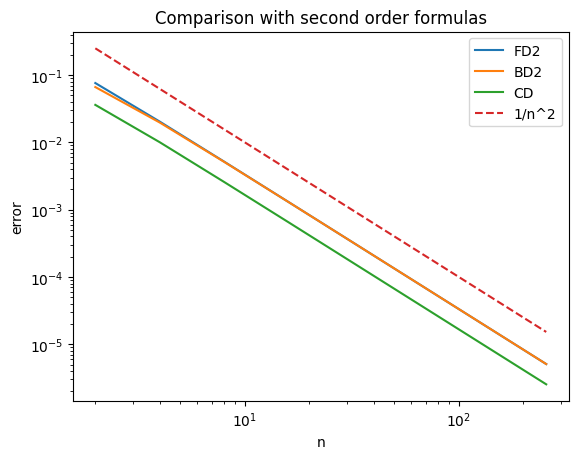

In [119]:
# Implement the BD second order formula in matrix form
def bd2(a,b,n):
  h = (b-a) / n
  bd2 = np.zeros((n+1,n+1))

  for i in range(2,n+1):
    bd2[i,i] = 3
    bd2[i,i-1] = -4
    bd2[i,i-2] = 1

  return bd2 / (2*h)

# Implement the FD second order formula in matrix form
def fd2(a,b,n):
  h = (b-a) / n
  fd2 = np.zeros((n+1,n+1))

  for i in range(n-1):
    fd2[i,i] = -3
    fd2[i,i+1] = +4
    fd2[i,i+2] = -1

  return fd2 / (2*h)

# Display in the same loglog plot the error of the FD2, BD2 and CD formulas to compare them
t = sym.var('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_x = sym.lambdify(t, my_f.diff(t,1))

no_expe = 8
error_fd2 = np.zeros(no_expe)
error_bd2 = np.zeros(no_expe)
error_cd = np.zeros(no_expe)
nn = np.zeros(no_expe)

for i in range(no_expe):
  n = 2**(i+1)
  nn[i] = n
  x = np.linspace(a,b,n+1)
  fd2_mat = fd2(a,b,n)
  bd2_mat = bd2(a,b,n)
  cd_mat = cd(a,b,n)
  u_x_fd2 = fd2_mat@fsym(x)
  u_x_bd2 = bd2_mat@fsym(x)
  u_x_cd = cd_mat@fsym(x)
  error_fd2[i] = max (abs(u_x_fd2[0:n-1]-fsym_x(x)[0:n-1]))
  error_bd2[i] = max (abs(u_x_bd2[2:n+1]-fsym_x(x)[2:n+1]))
  error_cd[i] = max (abs(u_x_cd[1:n]-fsym_x(x)[1:n]))
  
matplotlib.pyplot.loglog(nn,error_fd2)
matplotlib.pyplot.loglog(nn,error_bd2)
matplotlib.pyplot.loglog(nn,error_cd)
matplotlib.pyplot.loglog(nn,nn**(-2), linestyle='--')
matplotlib.pyplot.legend(['FD2','BD2','CD','1/n^2'])
matplotlib.pyplot.xlabel('n')
matplotlib.pyplot.ylabel('error')
matplotlib.pyplot.title('Comparison with second order formulas')
matplotlib.pyplot.show()


As expected, also the one-sided second order formulas have the same order of convergence as the CD formula, which is $O(h^2)$. However, again as expected from the theory, the constants in the error bounds are bigger in the case of the one-sided formulas. In fact, as can be seen from the plot, the error is bigger for the one-sided formulas than for the CD formula for the same value of $h$. We must also note that the one-sided formulas require three function evaluations, while the CD formula requires only two.

**Exercise 3** Repeat Exercise 2 this time considering the centered and one sided formulas for the approximation of the second derivative also found in the lecture notes.

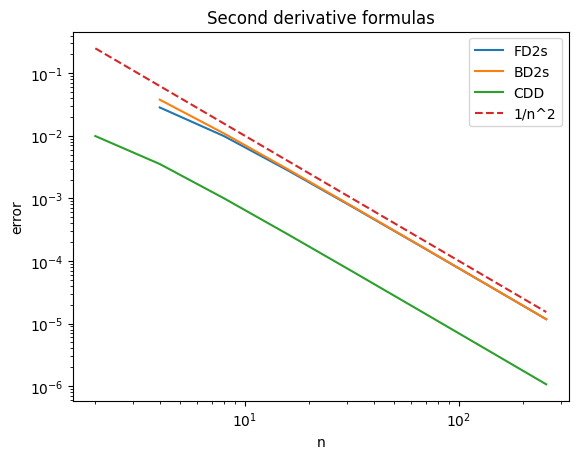

In [147]:
# Implement the second central divided difference formula in matrix form
def cdd(a,b,n):
  h = (b-a) / n
  cdd = np.zeros((n+1,n+1))

  for i in range(1,n):
    cdd[i,i] = -2
    cdd[i,i+1] = 1
    cdd[i,i-1] = 1

  return cdd / (h**2)

# Implement the one-sided formula for the second derivative in matrix form (forward)
def fd2s(a,b,n):
  h = (b-a) / n
  fd2s = np.zeros((n+1,n+1))

  for i in range(n-2):
    fd2s[i,i] = 2
    fd2s[i,i+1] = -5
    fd2s[i,i+2] = 4
    fd2s[i,i+3] = -1

  return fd2s / (h**2)

# Implement the one-sided formula for the second derivative in matrix form (backward)
def bd2s(a,b,n):
  h = (b-a) / n
  bd2s = np.zeros((n+1,n+1))

  for i in range(3,n+1):
    bd2s[i,i] = 2
    bd2s[i,i-1] = -5
    bd2s[i,i-2] = 4
    bd2s[i,i-3] = -1

  return bd2s / (h**2)

# Display in the loglog plot the error of the three formulas to compare them
t = sym.var('t')
my_f = sym.sin(t)
fsym = sym.lambdify(t, my_f)
fsym_x = sym.lambdify(t, my_f.diff(t,2))

no_expe = 8
error_fd2s = np.zeros(no_expe)
error_bd2s = np.zeros(no_expe)
error_cdd = np.zeros(no_expe)
nn = np.zeros(no_expe)

for i in range(no_expe):
  n = 2**(i+1)
  nn[i] = n
  x = np.linspace(a,b,n+1)
  fd2s_mat = fd2s(a,b,n)
  bd2s_mat = bd2s(a,b,n)
  cdd_mat = cdd(a,b,n)
  u_x_fd2s = fd2s_mat@fsym(x)
  u_x_bd2s = bd2s_mat@fsym(x)
  u_x_cdd = cdd_mat@fsym(x)
  if n>2:
    error_fd2s[i] = max (abs(u_x_fd2s[:n-2]-fsym_x(x)[:n-2]))
    error_bd2s[i] = max (abs(u_x_bd2s[3:n+1]-fsym_x(x)[3:n+1]))
  error_cdd[i] = max (abs(u_x_cdd[1:n]-fsym_x(x)[1:n]))
  
matplotlib.pyplot.loglog(nn[1:],error_fd2s[1:])
matplotlib.pyplot.loglog(nn[1:],error_bd2s[1:])
matplotlib.pyplot.loglog(nn,error_cdd)
matplotlib.pyplot.loglog(nn,nn**(-2), linestyle='--')
matplotlib.pyplot.legend(['FD2s','BD2s','CDD','1/n^2'])
matplotlib.pyplot.xlabel('n')
matplotlib.pyplot.ylabel('error')
matplotlib.pyplot.title('Second derivative formulas')
matplotlib.pyplot.show()



Also in this case, as expected, all the formulas have the same order of accuracy, which is $O(h^2)$. However, the constants in the error bounds are bigger for the one-sided formulas. The one-sided formulas require four function evaluations, while the centered formulas require only three.